# **Decision Tree on Own Dataset**

In [ ]:
import pandas as pd

data = {'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
        'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
        'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']}

df = pd.DataFrame(data)
print(df)

     Outlook Temperature Humidity  Windy Play Golf
0      Sunny         Hot     High  False        No
1      Sunny         Hot     High   True        No
2   Overcast         Hot     High  False       Yes
3      Rainy        Mild     High  False       Yes
4      Rainy        Cool   Normal  False       Yes
5      Rainy        Cool   Normal   True        No
6   Overcast        Cool   Normal   True       Yes
7      Sunny        Mild     High  False        No
8      Sunny        Cool   Normal  False       Yes
9      Rainy        Mild   Normal  False       Yes
10     Sunny        Mild   Normal   True       Yes
11  Overcast        Mild     High   True       Yes
12  Overcast         Hot   Normal  False       Yes
13     Rainy        Mild     High   True        No


In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Play Golf', axis=1)
y = df['Play Golf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

    Outlook  Temperature  Humidity  Windy
2         0            1         0      0
13        1            2         0      1
9         1            2         1      0
1         2            1         0      1
7         2            2         0      0
10        2            2         1      1
3         1            2         0      0
0         2            1         0      0
5         1            0         1      1
12        0            1         1      0
2     1
13    0
9     1
1     0
7     0
10    1
3     1
0     0
5     0
12    1
Name: Play Golf, dtype: int64
    Outlook  Temperature  Humidity  Windy
8         2            0         1      0
6         0            0         1      1
4         1            0         1      0
11        0            2         0      1
8     1
6     1
4     1
11    1
Name: Play Golf, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
feature_names = ['Outlook', 'Temperature', 'Humidity', 'Windy']
target_names = ['No', 'Yes']
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


DecisionTreeClassifier()
Accuracy: 0.5

Confusion Matrix:
 [[0 0]
 [2 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


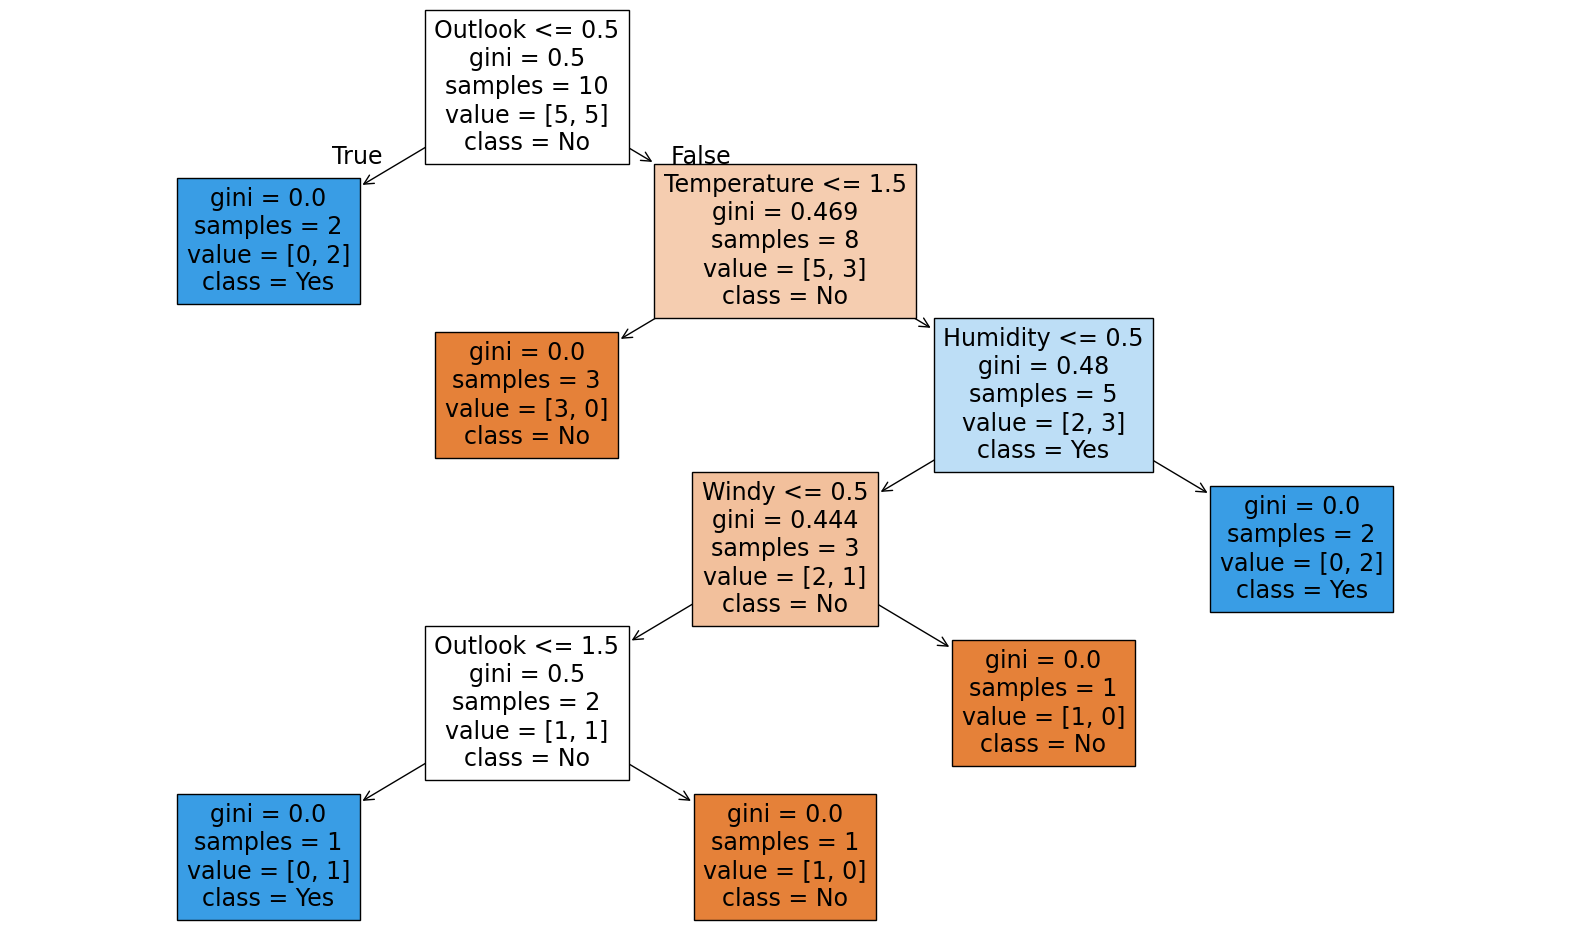

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = ['Outlook', 'Temperature', 'Humidity', 'Windy']
target_names = ['No', 'Yes']

fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(classifier,
          filled=True,
          feature_names=feature_names,
          class_names=target_names,
          ax=ax)
plt.show()

In [ ]:


import pandas as pd

print(y_train)

value_counts = y_train.value_counts()
print(value_counts)
probabilities = value_counts / len(y_train)
print(probabilities)
gini_impurity = 1 - sum(probabilities**2)

print(f"Class counts in y_train: {value_counts}")
print(f"Gini impurity for the root node: {gini_impurity:.3f}")

print(f"Gini impurity from the trained classifier's root node: {classifier.tree_.impurity[0]:.3f}")

2     1
13    0
9     1
1     0
7     0
10    1
3     1
0     0
5     0
12    1
Name: Play Golf, dtype: int64
Play Golf
1    5
0    5
Name: count, dtype: int64
Play Golf
1    0.5
0    0.5
Name: count, dtype: float64
Class counts in y_train: Play Golf
1    5
0    5
Name: count, dtype: int64
Gini impurity for the root node: 0.500
Gini impurity from the trained classifier's root node: 0.500


# **Decision Tree on Student dataset**

In [ ]:
import pandas as pd


df = pd.read_csv("student_data.csv")
print(df)

        Study_Hours  Prev_Exam_Score  Attendance_Pct  Pass
0                 6               49            87.0   0.0
1                 3               42            72.0   0.0
2                10               61            91.0   1.0
3                 7               33            50.0   0.0
4                 4               90            86.0   1.0
...             ...              ...             ...   ...
207145            7               78            97.0   1.0
207146           10               44            96.0   1.0
207147            8               96            85.0   1.0
207148            3               55            68.0   0.0
207149            9               54             NaN   NaN

[207150 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Pass', axis=1)
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

        Study_Hours  Prev_Exam_Score  Attendance_Pct
16089             3               35               4
51294             9               10               4
131909            9               12              37
148632            4               32              28
164641            8               34               1
...             ...              ...             ...
176963            3               21              49
117952            5               35               7
173685            5                3              15
43567             6               44              32
199340            8               35              16

[155362 rows x 3 columns]
16089     0
51294     1
131909    1
148632    0
164641    1
         ..
176963    0
117952    0
173685    0
43567     1
199340    1
Name: Pass, Length: 155362, dtype: int64
        Study_Hours  Prev_Exam_Score  Attendance_Pct
194972            4               46              29
73112             1               40              22
22312

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
feature_names = ['Study_Hours', 'Prev_Exam_Score', 'Attendance_Pct']
target_names = ['0', '1', '2']
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

DecisionTreeClassifier()
Accuracy: 0.9409708812852399

Confusion Matrix:
 [[27046  1302]
 [ 1755 21685]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     28348
           1       0.94      0.93      0.93     23440

    accuracy                           0.94     51788
   macro avg       0.94      0.94      0.94     51788
weighted avg       0.94      0.94      0.94     51788



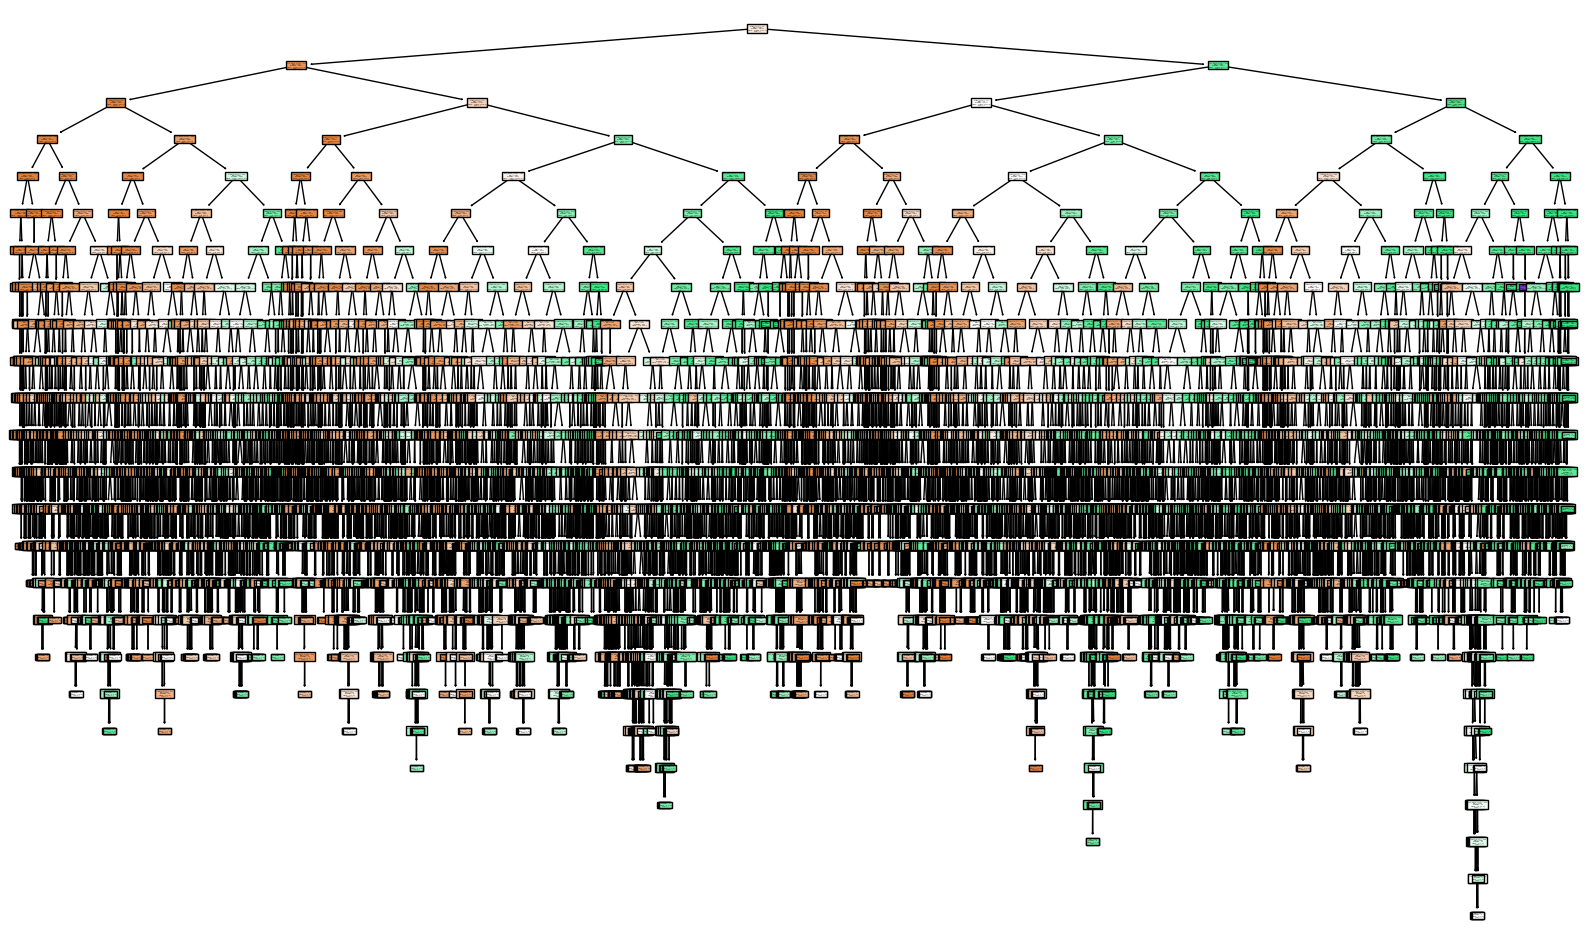

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = ['Study_Hours', 'Prev_Exam_Score', 'Attendance_Pct']
target_names = ['0', '1', '2']

fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(classifier,
          filled=True,
          feature_names=feature_names,
          class_names=target_names,
          ax=ax)
plt.show()

In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9409708812852399


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
feature_names = ['Study_Hours', 'Prev_Exam_Score', 'Attendance_Pct']
target_names = ['0', '1', '2']
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


DecisionTreeClassifier(max_depth=3)
Accuracy: 0.9138989727349965

Confusion Matrix:
 [[25196  3152]
 [ 1307 22133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     28348
           1       0.88      0.94      0.91     23440

    accuracy                           0.91     51788
   macro avg       0.91      0.92      0.91     51788
weighted avg       0.92      0.91      0.91     51788



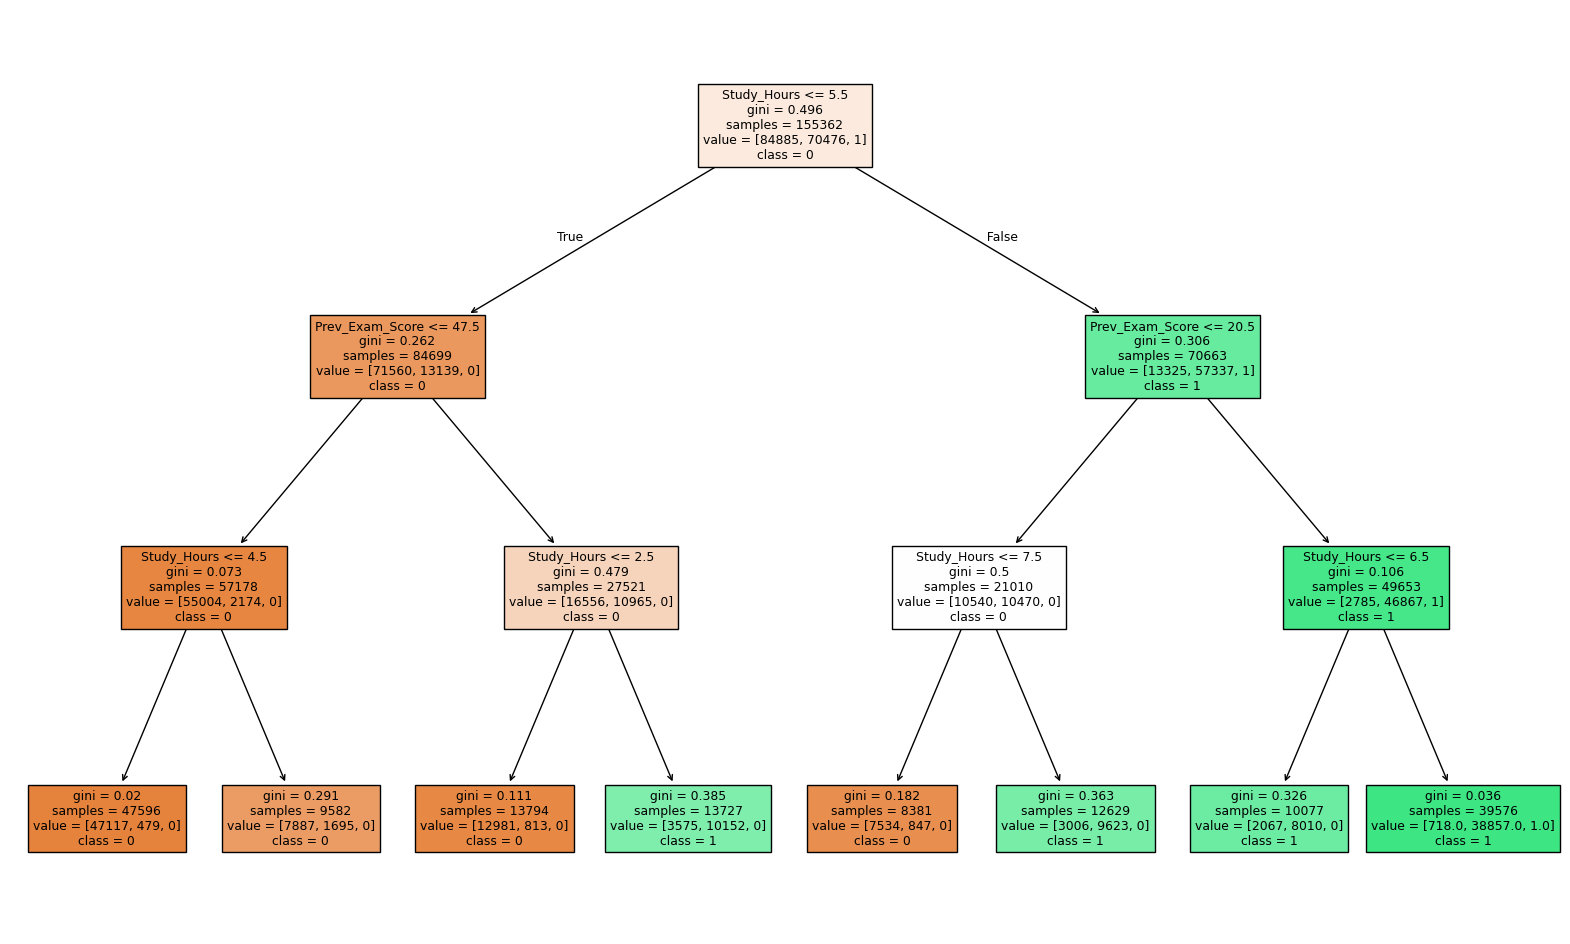

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = ['Study_Hours', 'Prev_Exam_Score', 'Attendance_Pct']
target_names = ['0', '1', '2']

fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(classifier,
          filled=True,
          feature_names=feature_names,
          class_names=target_names,
          ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_split=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
feature_names = ['Study_Hours', 'Prev_Exam_Score', 'Attendance_Pct']
target_names = ['0', '1', '2']
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


DecisionTreeClassifier(min_samples_split=100)
Accuracy: 0.9486560593187611

Confusion Matrix:
 [[27012  1336]
 [ 1323 22117]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     28348
           1       0.94      0.94      0.94     23440

    accuracy                           0.95     51788
   macro avg       0.95      0.95      0.95     51788
weighted avg       0.95      0.95      0.95     51788



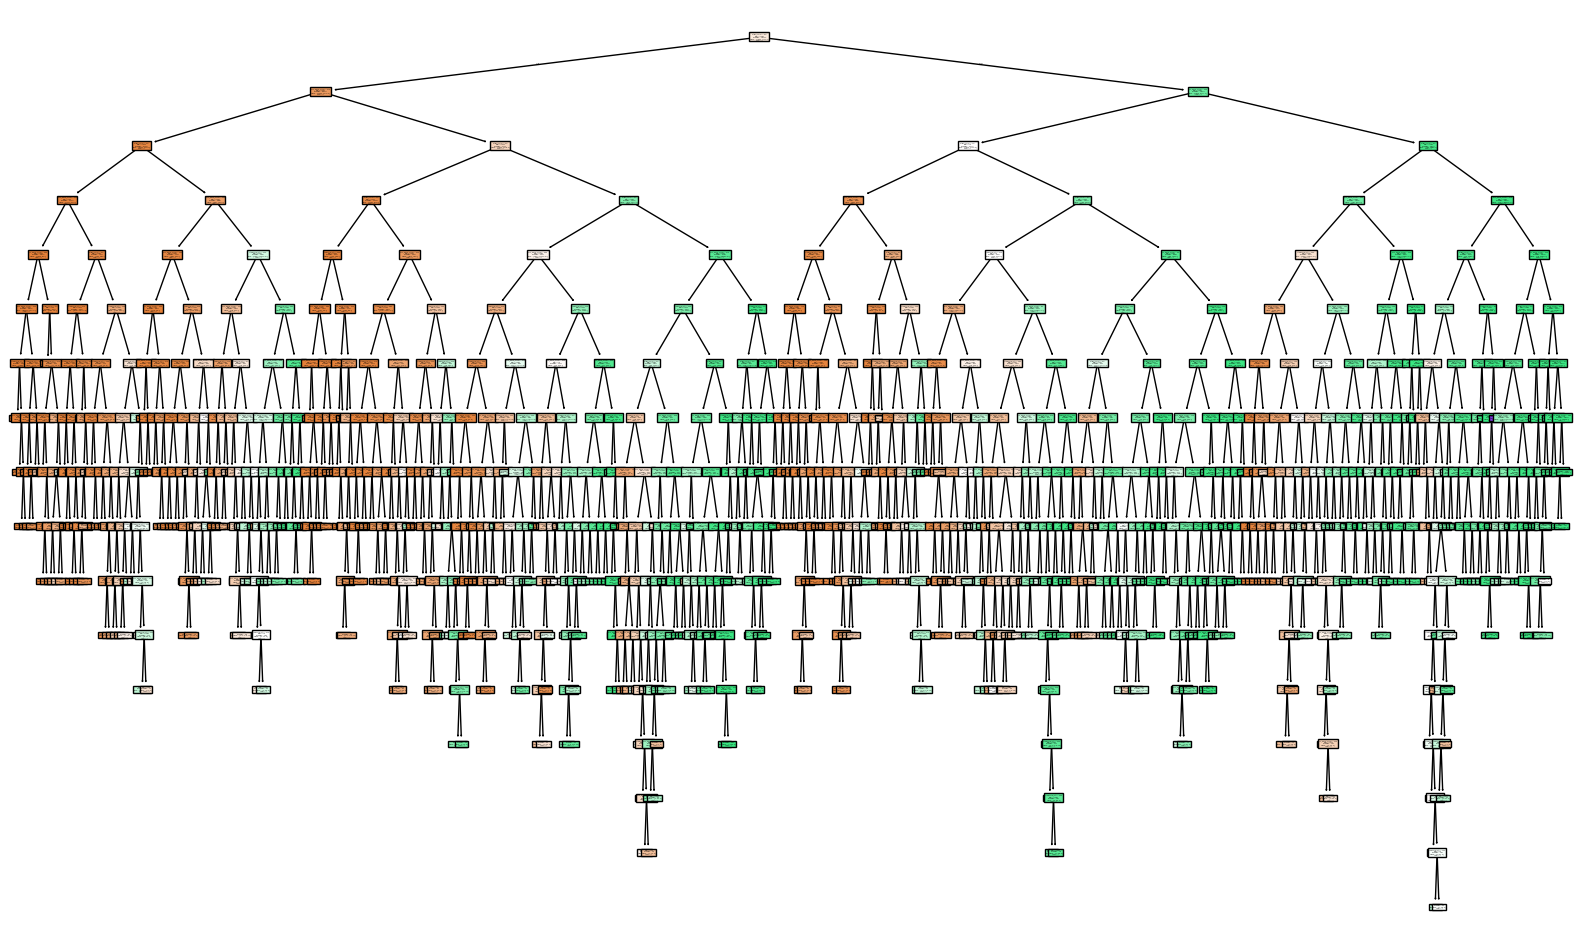

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = ['Study_Hours', 'Prev_Exam_Score', 'Attendance_Pct']
target_names = ['0', '1', '2']

fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(classifier,
          filled=True,
          feature_names=feature_names,
          class_names=target_names,
          ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_leaf=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
feature_names = ['Study_Hours', 'Prev_Exam_Score', 'Attendance_Pct']
target_names = ['0', '1', '2']
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


DecisionTreeClassifier(min_samples_leaf=100)
Accuracy: 0.9489263922144126

Confusion Matrix:
 [[27035  1313]
 [ 1332 22108]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     28348
           1       0.94      0.94      0.94     23440

    accuracy                           0.95     51788
   macro avg       0.95      0.95      0.95     51788
weighted avg       0.95      0.95      0.95     51788



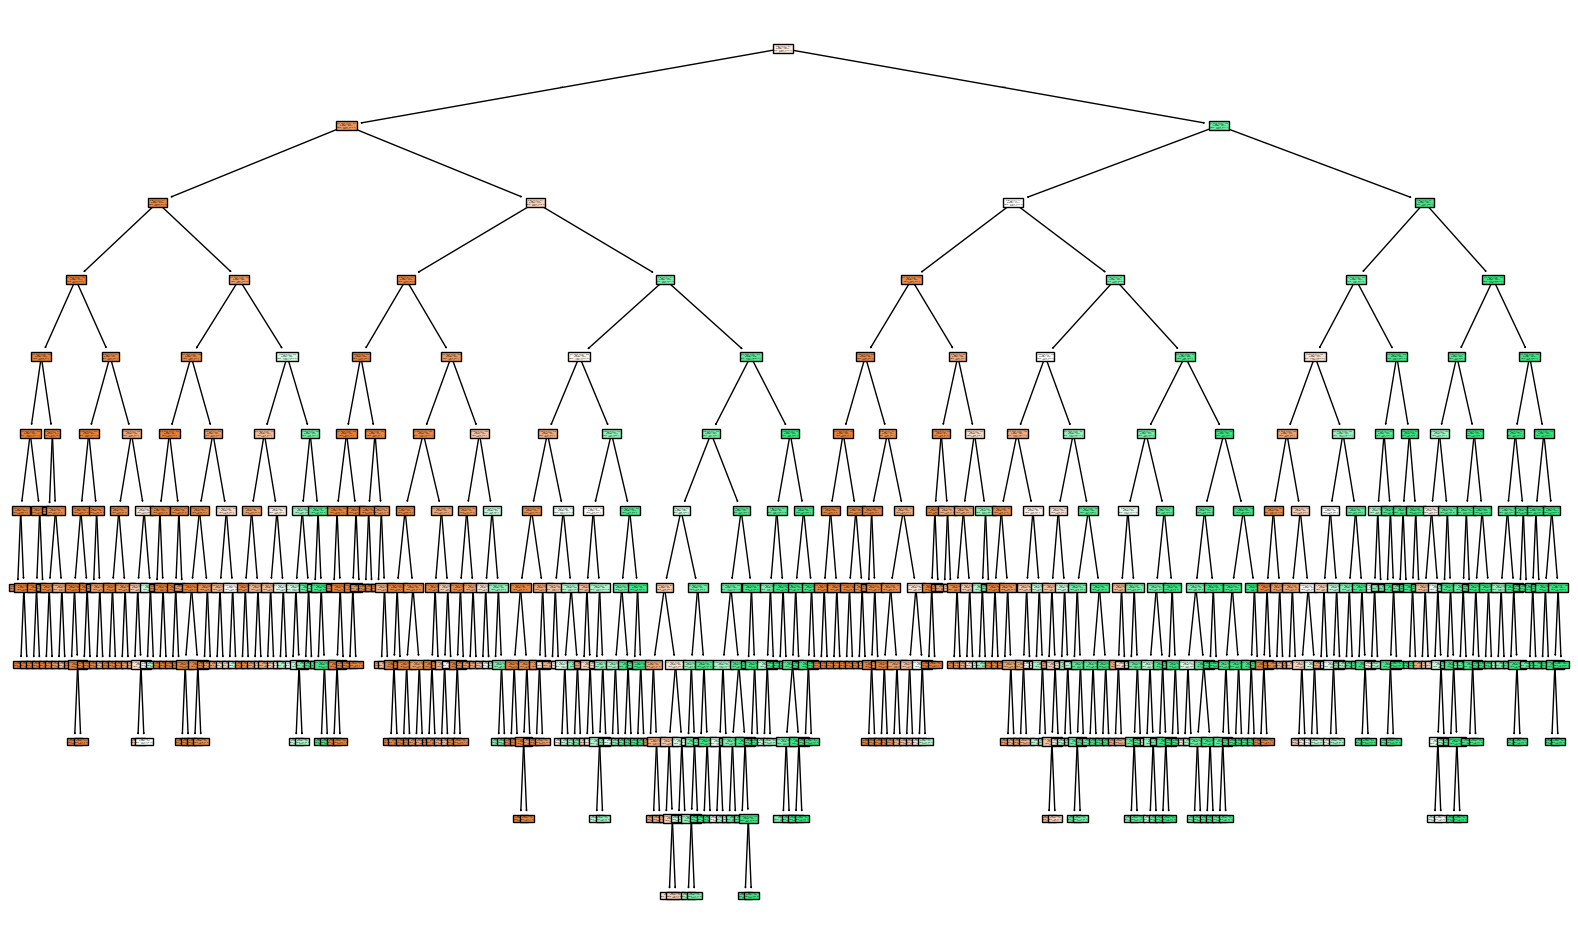

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names = ['Study_Hours', 'Prev_Exam_Score', 'Attendance_Pct']
target_names = ['0', '1', '2']

fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(classifier,
          filled=True,
          feature_names=feature_names,
          class_names=target_names,
          ax=ax)
plt.show()